In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

# Global Variables

In [2]:
t=True
f=False

# Load Movies Datarame

In [3]:
movies_df = pd.read_csv('./data/movies.csv')

In [4]:
movies_df.drop(['Unnamed: 0'],axis=1,inplace=t)

In [5]:
movies_df.head(5)

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,credits,cast,director
0,False,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,Transformers: Rise of the Beasts Collection,200000000,"Action, Adventure, Science Fiction",https://www.transformersmovie.com,667538,tt5090568,en,Transformers: Rise of the Beasts,...,"English, , Español",Released,Unite or fall.,Transformers: Rise of the Beasts,False,7.345,1033,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","Anthony Ramos, Dominique Fishback, Luna Lauren...",Steven Caple Jr.
1,False,/5YZbUmjbMa3ClvSW1Wj3D6XGolb.jpg,Guardians of the Galaxy Collection,250000000,"Science Fiction, Adventure, Action",https://www.marvel.com/movies/guardians-of-the...,447365,tt6791350,en,Guardians of the Galaxy Vol. 3,...,English,Released,Once more with feeling.,Guardians of the Galaxy Vol. 3,False,8.142,2973,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","Chris Pratt, Zoe Saldaña, Dave Bautista, Karen...",James Gunn
2,False,/4XM8DUTQb3lhLemJC51Jx4a2EuA.jpg,The Fast and the Furious Collection,340000000,"Action, Crime, Thriller",https://fastxmovie.com,385687,tt5433140,en,Fast X,...,"English, Bahasa indonesia, Italiano, Português",Released,The end of the road begins.,Fast X,False,7.358,2674,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","Vin Diesel, Michelle Rodriguez, Tyrese Gibson,...",Louis Leterrier
3,False,/oqP1qEZccq5AD9TVTIaO6IGUj7o.jpg,NaN,60000000,"Fantasy, Action, Adventure",https://kotzmovie.com,455476,tt6528290,en,Knights of the Zodiac,...,English,Released,Go beyond your destiny.,Knights of the Zodiac,False,6.552,469,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","Mackenyu, Madison Iseman, Diego Tinoco, Mark D...",Tomek Baginski
4,False,/eMPxmNvJjxVZIQWI2t1VmNC5IuR.jpg,NaN,0,"Action, Drama",https://www.soundoffreedommovie.com/,678512,tt7599146,en,Sound of Freedom,...,"Español, English",Released,Fight for the light. Silence the darkness.,Sound of Freedom,False,8.304,74,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","Jim Caviezel, Mira Sorvino, Bill Camp, Kurt Fu...",Alejandro Monteverde


In [6]:
movies_df.duplicated().sum()

9000

In [7]:
movies_df.drop_duplicates(inplace=True)

In [8]:
movies_df.duplicated().sum()

0

In [9]:
movies_df.shape

(10000, 28)

# Which Data Values Containing

In [10]:
movies_df.iloc[0]

adult                                                                False
backdrop_path                             /woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg
belongs_to_collection          Transformers: Rise of the Beasts Collection
budget                                                           200000000
genres                                  Action, Adventure, Science Fiction
homepage                                 https://www.transformersmovie.com
id                                                                  667538
imdb_id                                                          tt5090568
original_language                                                       en
original_title                            Transformers: Rise of the Beasts
overview                 When a new threat capable of destroying the en...
popularity                                                        5409.104
poster_path                               /gPbM0MK8CP8A174rmUwGsADNYKD.jpg
production_companies     

# Wanted Columns for Model Training

In [11]:
taken_columns = ['id','title','adult','genres','original_language','overview','production_companies','release_date','runtime','tagline','vote_average','vote_count','cast','director']

In [12]:
movies_df = movies_df[taken_columns]
movies_df

,id,title,adult,genres,original_language,overview,production_companies,release_date,runtime,tagline,vote_average,vote_count,cast,director
0,667538,Transformers: Rise of the Beasts,False,"Action, Adventure, Science Fiction",en,When a new threat capable of destroying the en...,"Skydance, Paramount, di Bonaventura Pictures, ...",2023-06-06,127,Unite or fall.,7.345,1033,"Anthony Ramos, Dominique Fishback, Luna Lauren...",Steven Caple Jr.
1,447365,Guardians of the Galaxy Vol. 3,False,"Science Fiction, Adventure, Action",en,"Peter Quill, still reeling from the loss of Ga...","Marvel Studios, Kevin Feige Productions",2023-05-03,150,Once more with feeling.,8.142,2973,"Chris Pratt, Zoe Saldaña, Dave Bautista, Karen...",James Gunn
2,385687,Fast X,False,"Action, Crime, Thriller",en,Over many missions and against impossible odds...,"Universal Pictures, Original Film, One Race, P...",2023-05-17,142,The end of the road begins.,7.358,2674,"Vin Diesel, Michelle Rodriguez, Tyrese Gibson,...",Louis Leterrier
3,455476,Knights of the Zodiac,False,"Fantasy, Action, Adventure",en,"When a headstrong street orphan, Seiya, in sea...","Stage 6 Films, Toei Animation",2023-04-27,113,Go beyond your destiny.,6.552,469,"Mackenyu, Madison Iseman, Diego Tinoco, Mark D...",Tomek Baginski
4,678512,Sound of Freedom,False,"Action, Drama",en,"The story of Tim Ballard, a former US governme...",Santa Fe Films,2023-07-03,131,Fight for the light. Silence the darkness.,8.304,74,"Jim Caviezel, Mira Sorvino, Bill Camp, Kurt Fu...",Alejandro Monteverde
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9586,The Bonfire of the Vanities,False,"Crime, Comedy, Drama",en,"After his mistress runs over a black teen, a W...",Warner Bros. Pictures,1990-12-21,125,"Take one Wall Street tycoon, his Fifth Avenue ...",5.559,415,"Tom Hanks, Bruce Willis, Melanie Griffith, Kim...",Brian De Palma
9996,530154,Lust Stories,False,"Drama, Romance",hi,An anthology of four stories that sheds light ...,"RSVP Movies, Flying Unicorn Entertainment",2018-06-15,120,Four Stories Four Climaxes,6.274,104,"Kiara Advani, Radhika Apte, Akash Thosar, Rand...",Karan Johar
9997,10278,Return to Paradise,False,"Drama, Thriller, Romance",en,"Lewis, Sheriff and Tony are three friends vaca...","Tetragram, Propaganda Films, PolyGram Filmed E...",1998-08-10,109,Give up three years of their lives or give up ...,6.475,261,"Vince Vaughn, Anne Heche, Joaquin Phoenix, Dav...",Joseph Ruben
9998,10664,[REC]²,False,"Thriller, Horror",es,"The action continues from [REC], with the medi...","Filmax, Castelao Productions, ICAA, Canal+ Esp...",2009-09-15,84,Fear Revisited.,6.601,1778,"Jonathan D. Mellor, Óscar Zafra, Ariel Casas, ...",Jaume Balagueró


In [79]:
movies_df[(movies_df.id==447365)]

,id,title,adult,genres,original_language,overview,production_companies,release_date,runtime,tagline,rating,vote_count,cast,director,year,tags
1,447365,Guardians of the Galaxy Vol. 3,False,"Science Fiction, Adventure, Action",en,"Peter Quill, still reeling from the loss of Ga...","Marvel Studios, Kevin Feige Productions",2023-05-03,150,Once more with feeling.,8.142,2973,"Chris Pratt, Zoe Saldaña, Dave Bautista, Karen...",James Gunn,2023,"False en Once more with feeling. Chris Pratt, ..."


# Data Preprocessing

In [13]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  int64  
 1   title                 10000 non-null  object 
 2   adult                 10000 non-null  bool   
 3   genres                9894 non-null   object 
 4   original_language     10000 non-null  object 
 5   overview              9933 non-null   object 
 6   production_companies  9460 non-null   object 
 7   release_date          9979 non-null   object 
 8   runtime               10000 non-null  int64  
 9   tagline               7343 non-null   object 
 10  vote_average          10000 non-null  float64
 11  vote_count            10000 non-null  int64  
 12  cast                  9934 non-null   object 
 13  director              9931 non-null   object 
dtypes: bool(1), float64(1), int64(3), object(9)
memory usage: 1.1+ MB


In [14]:
movies_df.isnull().sum().sort_values(ascending=False) / movies_df.shape[0] * 100

tagline                 26.57
production_companies     5.40
genres                   1.06
director                 0.69
overview                 0.67
cast                     0.66
release_date             0.21
id                       0.00
title                    0.00
adult                    0.00
original_language        0.00
runtime                  0.00
vote_average             0.00
vote_count               0.00
dtype: float64

<Axes: >

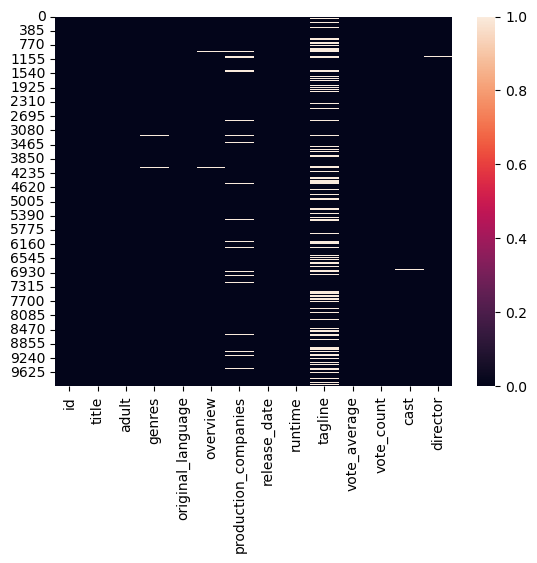

In [15]:
sns.heatmap(movies_df.isnull()) # Black indecating which have not null data

# getting year from release date

In [16]:
movies_df['release_date'][0]

'2023-06-06'

In [17]:
movies_df['release_date'].dtype

dtype('O')

In [18]:
from datetime import datetime

In [19]:
demo_date = '2015-11-20'
demo_date_format = "%Y-%m-%d"
demo_date = datetime.strptime(demo_date,demo_date_format)
print(demo_date.year)

2015


In [20]:
dummy_dates = ['2012-07-16','2019-08-15','2010-03-12','nan','2010-03-12']
dummy_year = []
for i in dummy_dates:
    #print(i)
    if i != 'nan':
        date_year = datetime.strptime(i, "%Y-%m-%d")
        dummy_year.append(date_year.year)
    else:
        dummy_year.append(None)
    
print(dummy_year)

[2012, 2019, 2010, None, 2010]


In [21]:
year = []
for i in movies_df['release_date']:
    if str(i) != 'nan':
        release = datetime.strptime(str(i), "%Y-%m-%d")
        year.append(str(release.year))
    else:
        year.append(None)
# print(year)
movies_df['year'] = year

In [22]:
movies_df.head(3)

,id,title,adult,genres,original_language,overview,production_companies,release_date,runtime,tagline,vote_average,vote_count,cast,director,year
0,667538,Transformers: Rise of the Beasts,False,"Action, Adventure, Science Fiction",en,When a new threat capable of destroying the en...,"Skydance, Paramount, di Bonaventura Pictures, ...",2023-06-06,127,Unite or fall.,7.345,1033,"Anthony Ramos, Dominique Fishback, Luna Lauren...",Steven Caple Jr.,2023
1,447365,Guardians of the Galaxy Vol. 3,False,"Science Fiction, Adventure, Action",en,"Peter Quill, still reeling from the loss of Ga...","Marvel Studios, Kevin Feige Productions",2023-05-03,150,Once more with feeling.,8.142,2973,"Chris Pratt, Zoe Saldaña, Dave Bautista, Karen...",James Gunn,2023
2,385687,Fast X,False,"Action, Crime, Thriller",en,Over many missions and against impossible odds...,"Universal Pictures, Original Film, One Race, P...",2023-05-17,142,The end of the road begins.,7.358,2674,"Vin Diesel, Michelle Rodriguez, Tyrese Gibson,...",Louis Leterrier,2023


In [23]:
movies_df['adult'] = movies_df['adult'].apply(lambda x: str(x))

In [24]:
movies_df.rename(columns={"vote_average": "rating"},inplace=True)

# Creating Tags for train ML model

In [25]:
movies_df['tags'] = movies_df['adult']+" "+movies_df['original_language']+" "+movies_df['tagline']+" "+movies_df['cast']+" "+movies_df['director']
movies_df['tags'].head(5)

0    False en Unite or fall. Anthony Ramos, Dominiq...
1    False en Once more with feeling. Chris Pratt, ...
2    False en The end of the road begins. Vin Diese...
3    False en Go beyond your destiny. Mackenyu, Mad...
4    False en Fight for the light. Silence the dark...
Name: tags, dtype: object

In [26]:
movies_ml = movies_df[['id','title','rating','vote_count','year','tags']]
movies_ml.head(5)

,id,title,rating,vote_count,year,tags
0,667538,Transformers: Rise of the Beasts,7.345,1033,2023,"False en Unite or fall. Anthony Ramos, Dominiq..."
1,447365,Guardians of the Galaxy Vol. 3,8.142,2973,2023,"False en Once more with feeling. Chris Pratt, ..."
2,385687,Fast X,7.358,2674,2023,False en The end of the road begins. Vin Diese...
3,455476,Knights of the Zodiac,6.552,469,2023,"False en Go beyond your destiny. Mackenyu, Mad..."
4,678512,Sound of Freedom,8.304,74,2023,False en Fight for the light. Silence the dark...


# Lower Case tags for creating ml models

In [27]:
movies_ml['tags'] = movies_ml['tags'].apply(lambda x:str(x).lower())
movies_ml['tags'].head(5)

C:\Users\navne\AppData\Local\Temp\ipykernel_28848\2414055689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_ml['tags'] = movies_ml['tags'].apply(lambda x:str(x).lower())


0    false en unite or fall. anthony ramos, dominiq...
1    false en once more with feeling. chris pratt, ...
2    false en the end of the road begins. vin diese...
3    false en go beyond your destiny. mackenyu, mad...
4    false en fight for the light. silence the dark...
Name: tags, dtype: object

# Tokkenize words

In [28]:
from nltk.tokenize import word_tokenize

In [29]:
movies_ml['tokkens'] = movies_ml['tags'].apply(lambda x: word_tokenize(x))
movies_ml['tokkens'].head(5)

C:\Users\navne\AppData\Local\Temp\ipykernel_28848\482739753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_ml['tokkens'] = movies_ml['tags'].apply(lambda x: word_tokenize(x))


0    [false, en, unite, or, fall, ., anthony, ramos...
1    [false, en, once, more, with, feeling, ., chri...
2    [false, en, the, end, of, the, road, begins, ....
3    [false, en, go, beyond, your, destiny, ., mack...
4    [false, en, fight, for, the, light, ., silence...
Name: tokkens, dtype: object

# removing stop words

In [30]:
from nltk.corpus import stopwords

In [31]:
import string 

In [32]:
stop_words = set(stopwords.words('english'))
special_chars = list(string.punctuation)

In [33]:
def removingStopWords(obj):
    stop_tags = []
    for w in obj:
        if w not in stop_words:
            if w not in special_chars:
                stop_tags.append(w)
    return stop_tags

In [34]:
check = removingStopWords(['this', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.'])
check

['sample', 'sentence', 'showing', 'stop', 'words', 'filtration']

In [35]:
movies_ml['without_stopwords'] = movies_ml['tokkens'].apply(removingStopWords)
movies_ml['without_stopwords'].head(5)

C:\Users\navne\AppData\Local\Temp\ipykernel_28848\1221274183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_ml['without_stopwords'] = movies_ml['tokkens'].apply(removingStopWords)


0    [false, en, unite, fall, anthony, ramos, domin...
1    [false, en, feeling, chris, pratt, zoe, saldañ...
2    [false, en, end, road, begins, vin, diesel, mi...
3    [false, en, go, beyond, destiny, mackenyu, mad...
4    [false, en, fight, light, silence, darkness, j...
Name: without_stopwords, dtype: object

# applying steeming

In [36]:
from nltk.stem import WordNetLemmatizer

In [37]:
ls = WordNetLemmatizer()

In [38]:
words = ["program", "programs", "programmer", "programming", "programmers"]

In [39]:
for w in words:
    print(w, " : ", ls.lemmatize(w,pos='v'))

program  :  program
programs  :  program
programmer  :  programmer
programming  :  program
programmers  :  programmers


In [40]:
def stemword(obj):
    stemTxt = []
    for i in obj:
        stemTxt.append(ls.lemmatize(i,pos='v'))
    return stemTxt

In [41]:
check = stemword(["program", "programs", "programmer", "programming", "programmers"])
check

['program', 'program', 'programmer', 'program', 'programmers']

In [42]:
movies_ml['stemming'] = movies_ml['without_stopwords'].apply(stemword)
movies_ml['stemming'].head(5)

C:\Users\navne\AppData\Local\Temp\ipykernel_28848\3380387142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_ml['stemming'] = movies_ml['without_stopwords'].apply(stemword)


0    [false, en, unite, fall, anthony, ramos, domin...
1    [false, en, feel, chris, pratt, zoe, saldaña, ...
2    [false, en, end, road, begin, vin, diesel, mic...
3    [false, en, go, beyond, destiny, mackenyu, mad...
4    [false, en, fight, light, silence, darkness, j...
Name: stemming, dtype: object

In [43]:
movies_ml.head(5)

,id,title,rating,vote_count,year,tags,tokkens,without_stopwords,stemming
0,667538,Transformers: Rise of the Beasts,7.345,1033,2023,"false en unite or fall. anthony ramos, dominiq...","[false, en, unite, or, fall, ., anthony, ramos...","[false, en, unite, fall, anthony, ramos, domin...","[false, en, unite, fall, anthony, ramos, domin..."
1,447365,Guardians of the Galaxy Vol. 3,8.142,2973,2023,"false en once more with feeling. chris pratt, ...","[false, en, once, more, with, feeling, ., chri...","[false, en, feeling, chris, pratt, zoe, saldañ...","[false, en, feel, chris, pratt, zoe, saldaña, ..."
2,385687,Fast X,7.358,2674,2023,false en the end of the road begins. vin diese...,"[false, en, the, end, of, the, road, begins, ....","[false, en, end, road, begins, vin, diesel, mi...","[false, en, end, road, begin, vin, diesel, mic..."
3,455476,Knights of the Zodiac,6.552,469,2023,"false en go beyond your destiny. mackenyu, mad...","[false, en, go, beyond, your, destiny, ., mack...","[false, en, go, beyond, destiny, mackenyu, mad...","[false, en, go, beyond, destiny, mackenyu, mad..."
4,678512,Sound of Freedom,8.304,74,2023,false en fight for the light. silence the dark...,"[false, en, fight, for, the, light, ., silence...","[false, en, fight, light, silence, darkness, j...","[false, en, fight, light, silence, darkness, j..."


In [44]:
movies_ml["stem_tags"] = movies_ml['stemming'].apply(lambda x: " ".join(x))
movies_ml["stem_tags"].head(5)

C:\Users\navne\AppData\Local\Temp\ipykernel_28848\68345207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_ml["stem_tags"] = movies_ml['stemming'].apply(lambda x: " ".join(x))


0    false en unite fall anthony ramos dominique fi...
1    false en feel chris pratt zoe saldaña dave bau...
2    false en end road begin vin diesel michelle ro...
3    false en go beyond destiny mackenyu madison is...
4    false en fight light silence darkness jim cavi...
Name: stem_tags, dtype: object

# CountVectoriser // Bag Of Words

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
cv = CountVectorizer(max_features=5000)

In [47]:
vectors = cv.fit_transform(movies_ml['stem_tags']).toarray()
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [48]:
vectors[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
features = cv.get_feature_names_out()

In [50]:
keyword_recommend = pd.DataFrame(vectors,columns=features)
keyword_recommend

,000,50,aaron,aasif,abbey,abbott,abby,abdul,abe,abel,...,zimmerman,zoe,zombie,zooey,zoë,zucker,álvarez,ángel,óscar,šerbedžija
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [51]:
keyword_recommend['title'] = movies_ml['title']
keyword_recommend['id'] = movies_ml['id']

In [52]:
keyword_recommend.head(5)

,000,50,aaron,aasif,abbey,abbott,abby,abdul,abe,abel,...,zombie,zooey,zoë,zucker,álvarez,ángel,óscar,šerbedžija,title,id
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Transformers: Rise of the Beasts,667538
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Guardians of the Galaxy Vol. 3,447365
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fast X,385687
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Knights of the Zodiac,455476
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Sound of Freedom,678512


In [53]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [54]:
keyword_recommend.set_index('title',inplace=t)
keyword_recommend.head(5)

000  50  aaron  aasif  abbey  abbott  abby  \
title                                                                          
Transformers: Rise of the Beasts    0   0      0      0      0       0     0   
Guardians of the Galaxy Vol. 3      0   0      0      0      0       0     0   
Fast X                              0   0      0      0      0       0     0   
Knights of the Zodiac               0   0      0      0      0       0     0   
Sound of Freedom                    0   0      0      0      0       0     0   

                                  abdul  abe  abel  abigail  abo  abraham  \
title                                                                       
Transformers: Rise of the Beasts      0    0     0        0    0        0   
Guardians of the Galaxy Vol. 3        0    0     0        0    0        0   
Fast X                                0    0     0        0    0        0   
Knights of the Zodiac                 0    0     0        0    0        0   
Sound of Freedom                      0    0     0        0    0        0   

                                  abrahams  abrams  ace  acevedo  ackerman  \
title                                                                        
Transformers: Rise of the Beasts         0       0    0        0         0   
Guardians of the Galaxy Vol. 3           0       0    0        0         0   
Fast X                                   0       0    0        0         0   
Knights of the Zodiac                    0       0    0        0         0   
Sound of Freedom                         0       0    0        0         0   

                                  acosta  acres  act  action  ada  adair  \
title                                                                      
Transformers: Rise of the Beasts       0      0    0       0    0      0   
Guardians of the Galaxy Vol. 3         0      0    0       0    0      0   
Fast X                                 0      0    0       0    0      0   
Knights of the Zodiac                  0      0    0       0    0      0   
Sound of Freedom                       0      0    0       0    0      0   

                                  adam  adams  adamson  adamthwaite  addison  \
title                                                                          
Transformers: Rise of the Beasts     0      0        0            0        0   
Guardians of the Galaxy Vol. 3       0      0        0            0        0   
Fast X                               0      0        0            0        0   
Knights of the Zodiac                0      0        0            0        0   
Sound of Freedom                     0      0        0            0        0   

                                  addy  adele  adkins  adler  adlon  adrian  \
title                                                                         
Transformers: Rise of the Beasts     0      0       0      0      0       0   
Guardians of the Galaxy Vol. 3       0      0       0      0      0       0   
Fast X                               0      0       0      0      0       0   
Knights of the Zodiac                0      0       0      0      0       0   
Sound of Freedom                     0      0       0      0      0       0   

                                  adriana  adriano  adrien  adrienne  \
title                                                                  
Transformers: Rise of the Beasts        0        0       0         0   
Guardians of the Galaxy Vol. 3          1        0       0         0   
Fast X                                  0        0       0         0   
Knights of the Zodiac                   0        0       0         0   
Sound of Freedom                        0        0       0         0   

                                  adventure  afemo  affleck  afraid  age  \
title                                                                      
Transformers: Rise of the Beasts          0      0        0       0    0   
Guard

# movies recomendation on the basis of tags using cosignSimilarity

In [55]:
from sklearn.metrics.pairwise import cosine_similarity

In [56]:
similarities = cosine_similarity(vectors)

In [57]:
similarities.shape

(10000, 10000)

In [58]:
similarities

array([[1.        , 0.11045379, 0.19695965, ..., 0.09104463, 0.03713907,
        0.09576506],
       [0.11045379, 1.        , 0.11470787, ..., 0.07423322, 0.03244428,
        0.05577287],
       [0.19695965, 0.11470787, 1.        , ..., 0.06933752, 0.03535534,
        0.09116562],
       ...,
       [0.09104463, 0.07423322, 0.06933752, ..., 1.        , 0.05883484,
        0.08091134],
       [0.03713907, 0.03244428, 0.03535534, ..., 0.05883484, 1.        ,
        0.04125685],
       [0.09576506, 0.05577287, 0.09116562, ..., 0.08091134, 0.04125685,
        1.        ]])

In [59]:
def recommend(movie):
    movie_index = movies_ml[movies_ml['title'] == movie].index[0]
    distances = similarities[movie_index]
    movies_list = sorted(list(enumerate(distances)),reverse=t,key=lambda x:x[-1])[1:11]
    movie_count = 0
    for i in movies_list:
        print(f"{movie_count+1}.) => {movies_ml['title'].iloc[i[0]]}")
        movie_count+=1
        print('-----------------------------')
recommend('Guardians of the Galaxy Vol. 3')

1.) => The Guardians of the Galaxy Holiday Special
-----------------------------
2.) => Guardians of the Galaxy Vol. 2
-----------------------------
3.) => Super
-----------------------------
4.) => Guardians of the Galaxy
-----------------------------
5.) => The Suicide Squad
-----------------------------
6.) => Slither
-----------------------------
7.) => Avengers: Infinity War
-----------------------------
8.) => Tromeo & Juliet
-----------------------------
9.) => Avengers: Endgame
-----------------------------
10.) => Scooby-Doo 2: Monsters Unleashed
-----------------------------


# movies recomendation on the basis of tags using knn

In [60]:
title_dataframe = pd.DataFrame(keyword_recommend.index)
title_dataframe.head(5)

,title
0,Transformers: Rise of the Beasts
1,Guardians of the Galaxy Vol. 3
2,Fast X
3,Knights of the Zodiac
4,Sound of Freedom


In [61]:
from sklearn.neighbors import NearestNeighbors

In [62]:
tags_knn = NearestNeighbors()

In [63]:
tags_knn.fit(keyword_recommend)

NearestNeighbors()

In [64]:
find_movie_name = keyword_recommend[(keyword_recommend['id']==447365)].index[0]
ind_movie_index = title_dataframe[(title_dataframe.title == find_movie_name)].index[0]
distance, index = tags_knn.kneighbors(keyword_recommend.iloc[[ind_movie_index]],n_neighbors=10+1)
index

array([[   1, 1228,  439, 4734, 1458,   24, 9314, 2875, 3341, 9062, 7986]],
      dtype=int64)

In [65]:
rec_movie_name = []
for i in index[0]:
    rec_movie_name.append(title_dataframe['title'].iloc[[i]].values)
rec_movie_name = np.ravel(rec_movie_name).tolist()
print(rec_movie_name[1:])

['Life in a Year', 'A Quiet Place', 'X-Men: The Mutant Watch', 'Pokémon Detective Pikachu', 'The Little Mermaid', 'Snow White', 'Skyscraper', 'Kickboxer: Retaliation', 'Inuyashiki', 'Adult Only Institute']


In [66]:
rec_movie_name[1:]

['Life in a Year',
 'A Quiet Place',
 'X-Men: The Mutant Watch',
 'Pokémon Detective Pikachu',
 'The Little Mermaid',
 'Snow White',
 'Skyscraper',
 'Kickboxer: Retaliation',
 'Inuyashiki',
 'Adult Only Institute']

# movie recommend on the basis of rating using KNN

In [67]:
ratings = pd.pivot_table(movies_ml,index="title",columns="vote_count",values="rating",aggfunc="sum",fill_value=0)
ratings.head(5)

vote_count                0      1      2      3      4      5      6      \
title                                                                       
#Alive                        0    0.0    0.0    0.0    0.0    0.0    0.0   
(500) Days of Summer          0    0.0    0.0    0.0    0.0    0.0    0.0   
*batteries not included       0    0.0    0.0    0.0    0.0    0.0    0.0   
...And God Created Woman      0    0.0    0.0    0.0    0.0    0.0    0.0   
...Watch Out, We're Mad       0    0.0    0.0    0.0    0.0    0.0    0.0   

vote_count                7      8      9      10     11     12     13     \
title                                                                       
#Alive                      0.0    0.0    0.0    0.0    0.0    0.0    0.0   
(500) Days of Summer        0.0    0.0    0.0    0.0    0.0    0.0    0.0   
*batteries not included     0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...And God Created Woman    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...Watch Out, We're Mad     0.0    0.0    0.0    0.0    0.0    0.0    0.0   

vote_count                14     15     16     17     18     19     20     \
title                                                                       
#Alive                      0.0    0.0    0.0    0.0    0.0    0.0    0.0   
(500) Days of Summer        0.0    0.0    0.0    0.0    0.0    0.0    0.0   
*batteries not included     0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...And God Created Woman    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...Watch Out, We're Mad     0.0    0.0    0.0    0.0    0.0    0.0    0.0   

vote_count                21     22     23     24     25     26     27     \
title                                                                       
#Alive                      0.0    0.0    0.0    0.0    0.0    0.0    0.0   
(500) Days of Summer        0.0    0.0    0.0    0.0    0.0    0.0    0.0   
*batteries not included     0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...And God Created Woman    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...Watch Out, We're Mad     0.0    0.0    0.0    0.0    0.0    0.0    0.0   

vote_count                28     29     30     31     32     33     34     \
title                                                                       
#Alive                      0.0    0.0    0.0    0.0    0.0    0.0    0.0   
(500) Days of Summer        0.0    0.0    0.0    0.0    0.0    0.0    0.0   
*batteries not included     0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...And God Created Woman    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...Watch Out, We're Mad     0.0    0.0    0.0    0.0    0.0    0.0    0.0   

vote_count                35     36     37     38     39     40     41     \
title                                                                       
#Alive                      0.0    0.0    0.0    0.0    0.0    0.0    0.0   
(500) Days of Summer        0.0    0.0    0.0    0.0    0.0    0.0    0.0   
*batteries not included     0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...And God Created Woman    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...Watch Out, We're Mad     0.0    0.0    0.0    0.0    0.0    0.0    0.0   

vote_count                42     43     44     45     46     47     48     \
title                                                                       
#Alive                      0.0    0.0    0.0    0.0    0.0    0.0    0.0   
(500) Days of Summer        0.0    0.0    0.0    0.0    0.0    0.0    0.0   
*batteries not included     0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...And God Created Woman    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...Watch Out, We're Mad     0.0    0.0    0.0    0.0    0.0    0.0    0.0   

vote_count                49     50     51     52     53     54     55     \
title                                                                       
#Alive                      0.0    0.0    0.0    0.0    0.0    0.0

In [68]:
rating_movie_list = pd.DataFrame(ratings.index)

In [69]:
ratings.shape

(9650, 3459)

In [70]:
from sklearn.neighbors import NearestNeighbors

In [71]:
rating_knn = NearestNeighbors()

In [72]:
rating_knn.fit(ratings)

NearestNeighbors()

In [73]:
rate_distance,rate_index = rating_knn.kneighbors(ratings.iloc[[rating_movie_list[(rating_movie_list['title'] == '(500) Days of Summer')].index[0]]],n_neighbors=11)
rate_index

array([[  1, 332, 207, 204, 358, 230, 211, 295, 384, 303, 392]],
      dtype=int64)

In [74]:
rate_index[0].tolist()

[1, 332, 207, 204, 358, 230, 211, 295, 384, 303, 392]

In [75]:
count_new = 0
for i in rate_index[0].tolist():
    if count_new == 0:
        pass
    else:
        print(f"{count_new}.) => {ratings.iloc[[i]].index[0]} => {movies_ml['rating'].iloc[[i]].values} having movie_id => {i}")
    count_new+=1

1.) => Acsexybility => [5.8] having movie_id => 332
2.) => A Kind of Kidnapping => [6.] having movie_id => 207
3.) => A House in Jerusalem => [7.7] having movie_id => 204
4.) => After Everything => [5.8] having movie_id => 358
5.) => A Newly Wedded Couple's Sex Life => [7.345] having movie_id => 230
6.) => A Lifelong Love => [7.354] having movie_id => 211
7.) => A-Side => [7.24] having movie_id => 295
8.) => Air Mata di Ujung Sajadah => [7.3] having movie_id => 384
9.) => AV Actress Tsubomi Seoul First Experience 2 => [5.382] having movie_id => 303
10.) => Ajmer 92 => [7.352] having movie_id => 392
